<a href="https://colab.research.google.com/github/iciromaco/RadiShLab/blob/master/%E7%8F%BE%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E3%82%B7%E3%83%AB%E3%82%A8%E3%83%83%E3%83%88%E7%94%BB%E5%83%8F%E3%81%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 前提
Google Colaboratory での実行を想定しています。
- Google Drive に RadishLab フォルダをコピーしてください。

ローカルPCで実行させる場合はパスが出てくる部分などを適当に書き換えてください。

- (Colab) と書かれている部分は Google Colaboratory でのみ有効なコードです。 

## Google ドライブに接続（Colab)
次のセルを実行し、表示されたリンク先にアクセスし、接続を許可します。表示されたコードを枠内にペーストしてEnterすると、左のエリアに drive というフォルダが現れます。

このフォルダ内の My Drive は自分の Google Drive そのものです。



In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/RadishLab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# RadishLabのライブラリのインポート


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rdlib4 as rd

# フォルダ内の画像の収集

In [3]:
# サンプルの画像フォルダのパス (Colab)
DATAFOLDER = '/content/drive/My Drive/RadishLab/RDSamples'
# ファイル名の確認
!ls /content/drive/My\ Drive/RadishLab/RDSamples

17daruma5o03_l.jpg  17horyot2o07_l.jpg	17nezumi2o02_l.jpg  RDSamplesTHUM.PNG
17heians1o04_l.jpg  17karami1o09_l.jpg	17ofukur1o07_l.jpg  Sample001.ipynb
17horyot1o06_l.jpg  17makoto2o06_l.jpg	17tukasa1o02_l.jpg


# サムネイル画像の作成と確認

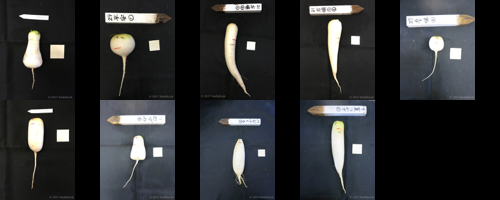

In [4]:
rd.makethumbnail(DATAFOLDER)

# 画像の表示

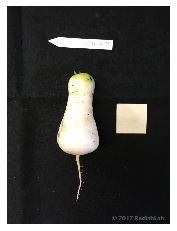

In [5]:
imgs = rd.collectimages(DATAFOLDER)
rd.plotimg(imgs[0])

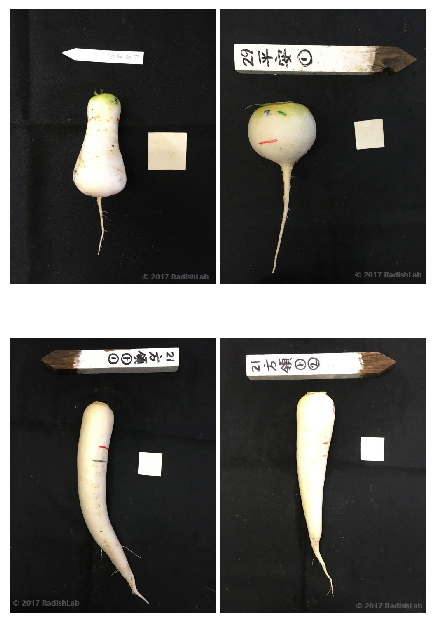

In [6]:
plt.figure(figsize=(6,8),dpi=100) # 横6x100,縦8x100のサイズを指定
rd.plotimg(rd.mkparaimage(imgs[0],imgs[1]), layout=211) # 2行1列配置の1個目
rd.plotimg(rd.mkparaimage(imgs[2],imgs[3]), layout=212) # 2行1列配置の2個目

# (4) マージンをつける


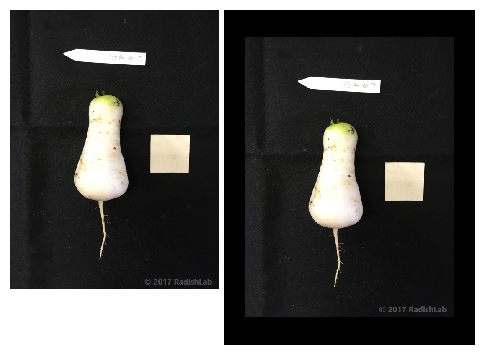

In [13]:
 img = imgs[0]
 img12 = rd.makemargin(img,mr=1.2) # 画像サイズが1.2倍になるようにマージンをつける
 plt.figure(figsize=(6,8),dpi=100)
 rd.plotimg(rd.mkparaimage(img,img12))

In [8]:
img.shape

(800, 600, 3)

In [9]:
len(img.shape)

3